In [14]:
import xml.etree.ElementTree as ET
import pandas as pd

def get_items(response):
    # 응답 데이터를 텍스트로 변환
    xml_string = response.text  # 또는 response.content.decode('utf-8')
    
    root = ET.fromstring(xml_string)
    item_list = []
    
    # 모든 row 엘리먼트 찾기
    rows = root.findall('row')
    
    # 각 row 엘리먼트에서 데이터 추출
    for row in rows:
        elements = row.findall('*')
        data = {}
        for element in elements:
            tag = element.tag.strip()
            text = element.text.strip() if element.text else None
            data[tag] = text
        item_list.append(data)
    
    return item_list

# items_list = get_items(res)
# items = pd.DataFrame(items_list)
# items.head()

In [15]:
import requests
import datetime
import certifi
import ssl

def get_data(statbl_id, datacycle_cd, cls_id):
    url = "https://www.reb.or.kr/r-one/openapi/SttsApiTblData.do?"
    service_key = "37f7a534514349d48f2cf77dc2691da3"
    

    call_code = "Key=" + service_key + "&" +\
        "pIndex=1&pSize=1000&" +\
        "STATBL_ID=" + statbl_id + "&" +\
        "DTACYCLE_CD=" + datacycle_cd +\
        "&START_WRTTIME=2022&END_WRTTIME=2025" +"&" +\
        "CLS_ID=" + cls_id
    
    print(url+call_code)
    res = requests.get(url + call_code, verify=certifi.where())
    return res

In [16]:
STATBL_ID = "A_2024_00060"
cls_id_list = ["530088", "530089", "530090"]
#cls_id_list = ["500009"]
tx_list = []
for cls_id in cls_id_list:
    res = get_data(STATBL_ID, "MM", cls_id)
    tx_list += get_items(res)
    
len(tx_list)
apt_tx = pd.DataFrame(tx_list)
apt_tx

https://www.reb.or.kr/r-one/openapi/SttsApiTblData.do?Key=37f7a534514349d48f2cf77dc2691da3&pIndex=1&pSize=1000&STATBL_ID=A_2024_00060&DTACYCLE_CD=MM&START_WRTTIME=2022&END_WRTTIME=2025&CLS_ID=530088
https://www.reb.or.kr/r-one/openapi/SttsApiTblData.do?Key=37f7a534514349d48f2cf77dc2691da3&pIndex=1&pSize=1000&STATBL_ID=A_2024_00060&DTACYCLE_CD=MM&START_WRTTIME=2022&END_WRTTIME=2025&CLS_ID=530089
https://www.reb.or.kr/r-one/openapi/SttsApiTblData.do?Key=37f7a534514349d48f2cf77dc2691da3&pIndex=1&pSize=1000&STATBL_ID=A_2024_00060&DTACYCLE_CD=MM&START_WRTTIME=2022&END_WRTTIME=2025&CLS_ID=530090


,STATBL_ID,DTACYCLE_CD,WRTTIME_IDTFR_ID,GRP_ID,GRP_NM,CLS_ID,CLS_NM,ITM_ID,ITM_NM,DTA_VAL,UI_NM,GRP_FULLNM,CLS_FULLNM,ITM_FULLNM,WRTTIME_DESC
0,A_2024_00060,MM,202201,None,None,530088,덕양구,100001,가격,609523,천원,None,경기>경의권>고양시>덕양구,가격,2022년 1월
1,A_2024_00060,MM,202202,None,None,530088,덕양구,100001,가격,608799,천원,None,경기>경의권>고양시>덕양구,가격,2022년 2월
2,A_2024_00060,MM,202203,None,None,530088,덕양구,100001,가격,607344,천원,None,경기>경의권>고양시>덕양구,가격,2022년 3월
3,A_2024_00060,MM,202204,None,None,530088,덕양구,100001,가격,606240,천원,None,경기>경의권>고양시>덕양구,가격,2022년 4월
4,A_2024_00060,MM,202205,None,None,530088,덕양구,100001,가격,606120,천원,None,경기>경의권>고양시>덕양구,가격,2022년 5월
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,A_2024_00060,MM,202404,None,None,530090,일산서구,100001,가격,465870,천원,None,경기>경의권>고양시>일산서구,가격,2024년 4월
92,A_2024_00060,MM,202405,None,None,530090,일산서구,100001,가격,465454,천원,None,경기>경의권>고양시>일산서구,가격,2024년 5월
93,A_2024_00060,MM,202406,None,None,530090,일산서구,100001,가격,464099,천원,None,경기>경의권>고양시>일산서구,가격,2024년 6월
94,A_2024_00060,MM,202407,None,None,530090,일산서구,100001,가격,462788.72,천원,None,경기>경의권>고양시>일산서구,가격,2024년 7월


In [17]:
goyang_apt_tx = apt_tx.drop(['DTACYCLE_CD', 'STATBL_ID','GRP_ID','GRP_NM','CLS_ID','ITM_ID','GRP_FULLNM', 'CLS_FULLNM','ITM_FULLNM'], axis=1)
goyang_apt_tx.isnull().sum()

WRTTIME_IDTFR_ID    0
CLS_NM              0
ITM_NM              0
DTA_VAL             0
UI_NM               0
WRTTIME_DESC        0
dtype: int64

In [18]:
# 수치형식 변환
goyang_apt_tx['WRTTIME_IDTFR_ID'] = goyang_apt_tx['WRTTIME_IDTFR_ID'].astype(int)
goyang_apt_tx['DTA_VAL'] = goyang_apt_tx['DTA_VAL'].astype(float)
goyang_apt_tx['DTA_VAL'] = goyang_apt_tx['DTA_VAL']/10

In [19]:
# 항목별 범주형 데이터 확인
# goyang_apt_tx['WRTTIME_IDTFR_ID'].value_counts()
# goyang_apt_tx['CLS_NM'].value_counts()
# goyang_apt_tx['ITM_NM'].value_counts()
goyang_apt_tx['UI_NM'].value_counts()

UI_NM
천원    96
Name: count, dtype: int64

In [20]:
# 수치형 데이터 기본 EDA
goyang_apt_tx['DTA_VAL'].describe()

count       96.000000
mean     56018.629284
std       7236.131123
min      46278.872000
25%      49092.000000
50%      56134.450000
75%      60987.800000
max      69317.700000
Name: DTA_VAL, dtype: float64

In [21]:
goyang_apt_tx

,WRTTIME_IDTFR_ID,CLS_NM,ITM_NM,DTA_VAL,UI_NM,WRTTIME_DESC
0,202201,덕양구,가격,60952.30000,천원,2022년 1월
1,202202,덕양구,가격,60879.90000,천원,2022년 2월
2,202203,덕양구,가격,60734.40000,천원,2022년 3월
3,202204,덕양구,가격,60624.00000,천원,2022년 4월
4,202205,덕양구,가격,60612.00000,천원,2022년 5월
...,...,...,...,...,...,...
91,202404,일산서구,가격,46587.00000,천원,2024년 4월
92,202405,일산서구,가격,46545.40000,천원,2024년 5월
93,202406,일산서구,가격,46409.90000,천원,2024년 6월
94,202407,일산서구,가격,46278.87200,천원,2024년 7월


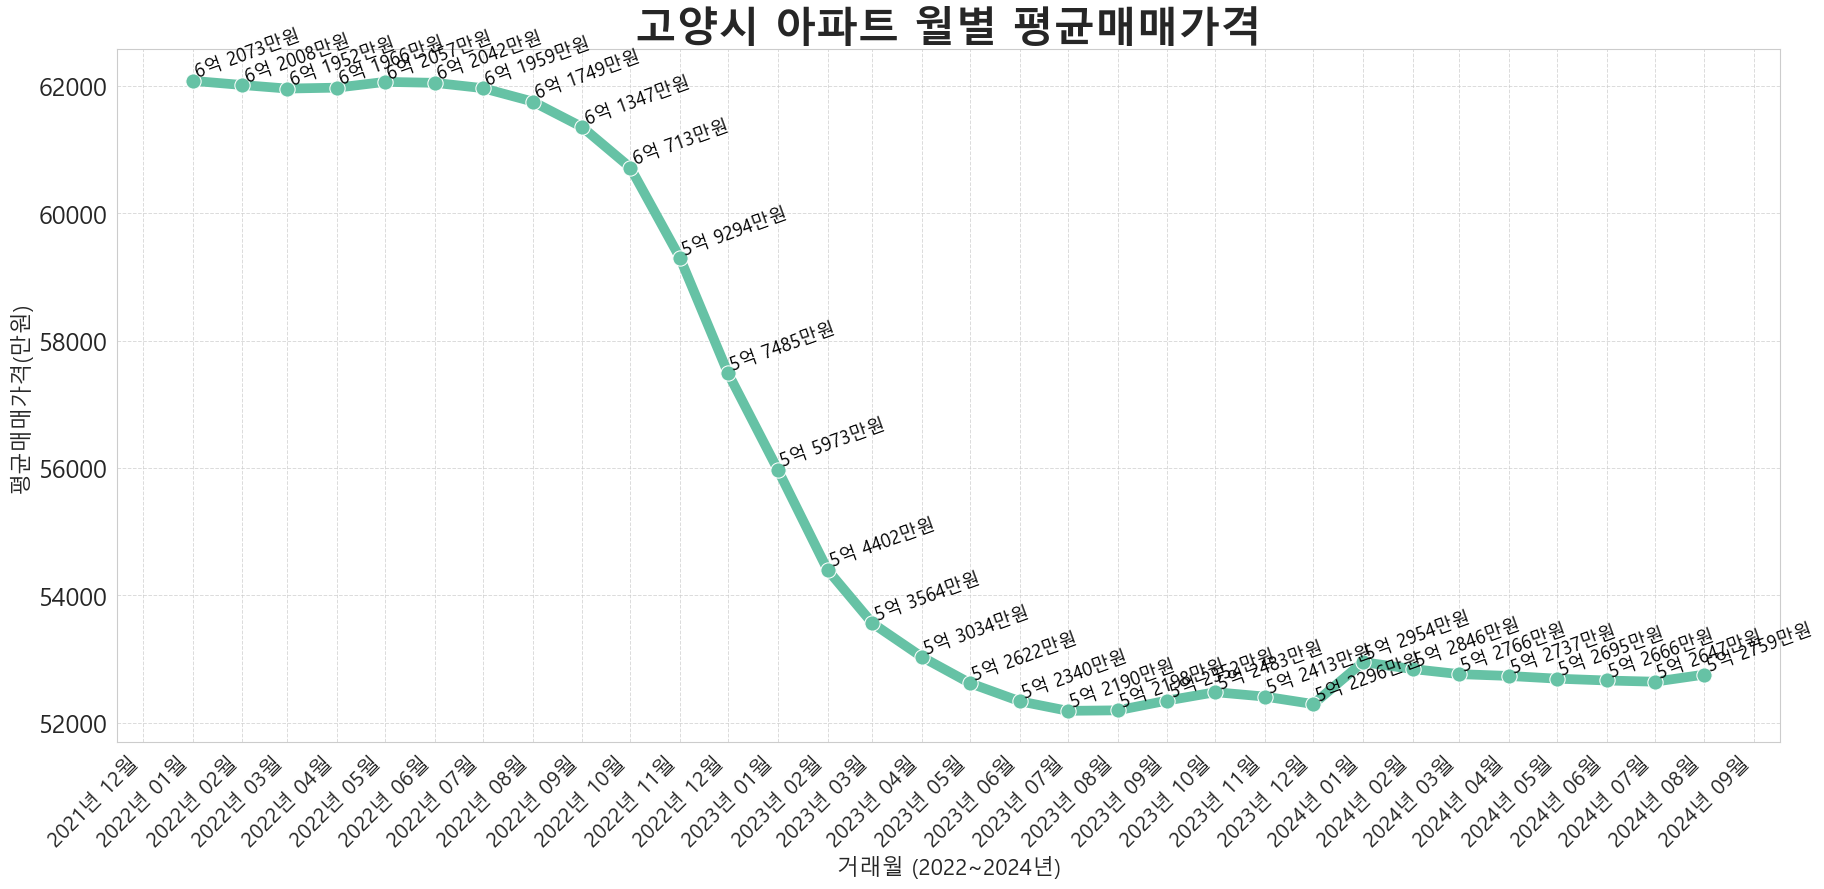

In [22]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc
import seaborn as sns
import matplotlib.dates as mdates
import pandas as pd

# 한글 폰트 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # 사용할 폰트 경로 삽입
font = fm.FontProperties(fname=font_path).get_name()
rc('font', family=font)

# 데이터 전처리
goyang_monthly_tx = goyang_apt_tx.copy()
goyang_monthly_tx['WRTTIME_IDTFR_ID'] = pd.to_datetime(goyang_monthly_tx['WRTTIME_IDTFR_ID'], format='%Y%m')

monthly_avg_tx = goyang_monthly_tx.groupby('WRTTIME_IDTFR_ID')['DTA_VAL'].mean().reset_index()

# 그래프 설정
plt.figure(figsize=(18, 9))

# 스타일 및 색상 설정
sns.set_palette("Set2")  # 부드러운 색상 팔레트 사용
sns.lineplot(data=monthly_avg_tx, x='WRTTIME_IDTFR_ID', y='DTA_VAL', marker='o',  markersize = 11, linewidth=7)

# 제목과 축 레이블 설정
plt.title('고양시 아파트 월별 평균매매가격', fontsize=30, weight='bold')
plt.xlabel('거래월 (2022~2024년)', fontsize=16)
plt.ylabel('평균매매가격(만원)', fontsize=16)

# 날짜 포맷 설정
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y년 %m월'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

# X축과 Y축 눈금 글자 크기 설정
plt.xticks(rotation=45, ha='right', fontsize=15)
plt.yticks(fontsize=18)

# 눈금선 추가 및 스타일 설정
plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)

# 레이아웃 조정
plt.tight_layout()

# 각 데이터 포인트 위에 평균 거래금액 표시
for i in range(len(monthly_avg_tx)):
    # 거래금액을 억과 만으로 나누기 (정수로 처리)
    deal_amount = monthly_avg_tx['DTA_VAL'].iloc[i]
    billions = int(deal_amount // 10000)  # 억 단위
    ten_thousands = int(deal_amount % 10000)  # 만 단위
    
    # 억과 만 단위를 합쳐서 원하는 형식으로 포맷
    if billions > 0:
        label = f'{billions}억 {ten_thousands}만원'
    else:
        label = f'{ten_thousands}만원'  # 억 단위가 없을 경우

    # 텍스트 표시
    plt.text(monthly_avg_tx['WRTTIME_IDTFR_ID'].iloc[i], 
             monthly_avg_tx['DTA_VAL'].iloc[i], 
             label, 
             ha='left', va='bottom', fontsize=13, color='black', rotation = 20)

# 그래프 표시
plt.show()

In [177]:
import dash
from dash import dcc, html
import plotly.express as px
import pandas as pd

# 데이터 전처리
goyang_monthly_tx = goyang_apt_tx.copy()
goyang_monthly_tx['WRTTIME_IDTFR_ID'] = pd.to_datetime(goyang_monthly_tx['WRTTIME_IDTFR_ID'], format='%Y%m')
monthly_avg_tx = goyang_monthly_tx.groupby('WRTTIME_IDTFR_ID')['DTA_VAL'].mean().reset_index()

# 초기 데이터 필터링
filtered_data = monthly_avg_tx

# y축 최솟값과 최댓값 계산
y_min = filtered_data['DTA_VAL'].min()
y_min_with_margin = y_min - (y_min * 0.03)  # 3% 마진 추가
y_max = filtered_data['DTA_VAL'].max()
y_max_with_margin = y_max + (y_max * 0.03)  # 3% 마진 추가

# Plotly 그래프 생성
fig = px.line(filtered_data, 
              x='WRTTIME_IDTFR_ID', 
              y='DTA_VAL', 
              markers=True, 
              labels={'WRTTIME_IDTFR_ID': '거래월', 'DTA_VAL': '평균매매가격(만원)'})

# 선 그래프 색상 및 굵기 설정
fig.update_traces(line=dict(color='#007BFF', width=7),  # 밝고 비비드한 파란색
                  marker=dict(size=11, color='#007BFF', symbol='circle'))  # 큰 빨간색 마커 추가

# y축 라벨 형식 수정
tickvals = list(range(int(y_min_with_margin // 1000 * 1000), int(y_max_with_margin // 1000 * 1000) + 1000, 1000))  # 리스트로 변환
ticktext = [f"{int(value // 10000)}억{value % 10000:04}만원" for value in tickvals]  # 형식 수정

# 그래프 레이아웃 업데이트 (크기, 제목, 축 스타일, 배경색 등)
fig.update_layout(
    title={
        'text': '고양시 아파트 월별 평균매매가격',
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {'size': 28, 'family': 'Montserrat', 'color': '#2B3E50'}
    },
    #template="plotly_white",  # 화이트 테마 적용
    xaxis=dict(
        title='거래월 (2022~2024년)',
        tickfont=dict(size=16, family='Roboto', color='#3E3E3E'),  # 큰 글꼴 적용
        titlefont=dict(size=20, family='Roboto', color='#2B3E3E'),
        tickmode='linear',
        dtick='M1',  # 매월 눈금 표시
        #showgrid=True,  # 세로선 표시
        #gridcolor='rgba(211, 211, 211, 0.5)',  # 연한 회색 점선
        gridwidth=1
    ),
    yaxis=dict(
        title='평균매매가격(만원)',
        tickfont=dict(size=16, family='Roboto', color='#3E3E3E'),
        titlefont=dict(size=20, family='Roboto', color='#2B3E50'),
        tickmode='array',  # 수동으로 tick 설정
        tickvals=tickvals,  # y축 눈금 위치
        ticktext=ticktext,  # y축 눈금 라벨
        # showgrid=True,  # 가로선 표시
        # gridcolor='rgba(211, 211, 211, 0.5)',  # 연한 회색 점선
        # gridwidth=1,
        range=[y_min_with_margin, y_max_with_margin]  # y축의 최솟값과 최댓값에 마진 추가
    ),
    width=1200,  # 그래프 너비
    height=700,  # 그래프 높이
    plot_bgcolor='white',  # 그래프 배경색을 깔끔한 흰색으로
    paper_bgcolor='#F8F8FF',   # 전체 배경색을 가벼운 회색
    xaxis_tickformat='%Y년 %m월',
    xaxis_tickangle=45,  # x축 눈금 기울기
    margin=dict(l=40, r=40, t=80, b=60),  # 여백 조정
)

# y축 점선 추가
for y_value in range(int(y_min_with_margin//1000*1000), int(y_max_with_margin//1000*1000), 1000):
    fig.add_shape(type='line',
                  xref='paper', x0=0, x1=1,
                  yref='y', y0=y_value, y1=y_value,
                  line=dict(color="rgba(180,180,180,0.7)", width=1, dash="dot"))  # 점선과 굵기 설정

# x축 점선 추가
for x_value in filtered_data['WRTTIME_IDTFR_ID']:
    fig.add_shape(type='line',
                  yref='paper', y0=0, y1=1,
                  xref='x', x0=x_value, x1=x_value,
                  line=dict(color="rgba(180,180,180,0.7)", width=1, dash="dot"))  # 점선과 굵기 설정

# 포인트 위에 텍스트 추가
for i in range(len(filtered_data)):
    deal_amount = filtered_data['DTA_VAL'].iloc[i]
    billions = int(deal_amount // 10000)
    ten_thousands = int(deal_amount % 10000)

    # 형식 수정: 5억2000만원
    if billions > 0:
        label = f'{billions}억{ten_thousands:04}만원'  # 4자리 수로 포맷
    else:
        label = f'{ten_thousands}만원'
    
    fig.add_annotation(
        x=filtered_data['WRTTIME_IDTFR_ID'].iloc[i],
        y=deal_amount,
        text=label, 
        showarrow=False,
        textangle=-25,  # 오른쪽으로 기울이기
        xanchor='left',  # 텍스트의 시작점을 왼쪽으로 설정
        yanchor='bottom',  # 텍스트의 시작점을 아래쪽으로 설정
        font=dict(size=12, color="black"),  # 폰트 크기와 색상 설정
        xshift=10  # 오른쪽으로 이동
    )

# Dash 애플리케이션 초기화
app = dash.Dash(__name__)

# 레이아웃 정의
app.layout = html.Div([
    dcc.Graph(id='line-chart', figure=fig)
])

# 애플리케이션 실행
if __name__ == '__main__':
    app.run_server(debug=True)


In [195]:
import dash
from dash import dcc, html
import plotly.express as px
import pandas as pd

# 데이터 전처리
goyang_monthly_tx = goyang_apt_tx.copy()
goyang_monthly_tx['WRTTIME_IDTFR_ID'] = pd.to_datetime(goyang_monthly_tx['WRTTIME_IDTFR_ID'], format='%Y%m')
monthly_avg_tx = goyang_monthly_tx.groupby('WRTTIME_IDTFR_ID')['DTA_VAL'].mean().reset_index()

# 초기 데이터 필터링
filtered_data = monthly_avg_tx

# y축 최솟값과 최댓값 계산
y_min = filtered_data['DTA_VAL'].min()
y_min_with_margin = y_min - (y_min * 0.03)  # 3% 마진 추가
y_max = filtered_data['DTA_VAL'].max()
y_max_with_margin = y_max + (y_max * 0.03)  # 3% 마진 추가

# Plotly 그래프 생성
fig = px.line(filtered_data, 
              x='WRTTIME_IDTFR_ID', 
              y='DTA_VAL', 
              markers=False, 
              labels={'WRTTIME_IDTFR_ID': '거래월', 'DTA_VAL': '평균매매가격(만원)'})

# 선 그래프 색상 및 굵기 설정
fig.update_traces(line=dict(color='#007BFF', width=4))

# y축 라벨 형식 수정
tickvals = list(range(int(y_min_with_margin // 1000 * 1000), int(y_max_with_margin // 1000 * 1000) + 1000, 1000))  # 리스트로 변환
ticktext = [f"{int(value // 10000)}억{value % 10000:04}만원" for value in tickvals]  # 형식 수정

# 그래프 레이아웃 업데이트 (크기, 제목, 축 스타일, 배경색 등)
fig.update_layout(
    title={
        'text': '고양시 아파트 월별 평균매매가격',
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {'size': 28, 'family': 'Montserrat', 'color': '#2B3E50'}
    },
    #template="plotly_white",  # 화이트 테마 적용
    xaxis=dict(
        showline=True,
        showgrid=False,
        showticklabels=True,
        linecolor='rgb(204, 204, 204)',
        title='거래월 (2022~2024년)',
        tickfont=dict(size=12, family='Arial', color='rgb(82, 82, 82)'),  # 큰 글꼴 적용
        titlefont=dict(size=16, family='Arial', color='#2B3E3E'),
        tickmode='linear',
        dtick='M1',  # 매월 눈금 표시
        #showgrid=True,  # 세로선 표시
        #gridcolor='rgba(211, 211, 211, 0.5)',  # 연한 회색 점선
        gridwidth=1
    ),
    yaxis=dict(
        zeroline=False,
        showline=True,
        showgrid=False,
        linecolor='rgb(204, 204, 204)',
        title='평균매매가격(만원)',
        tickfont=dict(size=12, family='Arial', color='#3E3E3E'),
        titlefont=dict(size=16, family='Arial', color='#2B3E50'),
        tickmode='array',  # 수동으로 tick 설정
        tickvals=tickvals,  # y축 눈금 위치
        ticktext=ticktext,  # y축 눈금 라벨
        # showgrid=True,  # 가로선 표시
        # gridcolor='rgba(211, 211, 211, 0.5)',  # 연한 회색 점선
        # gridwidth=1,
        range=[y_min_with_margin, y_max_with_margin]  # y축의 최솟값과 최댓값에 마진 추가
    ),
    width=1200,  # 그래프 너비
    height=700,  # 그래프 높이
    plot_bgcolor='white',  # 그래프 배경색을 깔끔한 흰색으로
    #paper_bgcolor='#F8F8FF',   # 전체 배경색을 가벼운 회색
    paper_bgcolor='white',   # 전체 배경색을 가벼운 회색
    xaxis_tickformat='%Y년 %m월',
    xaxis_tickangle=45,  # x축 눈금 기울기
    margin=dict(l=40, r=40, t=80, b=60),  # 여백 조정
)

# # y축 점선 추가
# for y_value in range(int(y_min_with_margin//1000*1000), int(y_max_with_margin//1000*1000), 1000):
#     fig.add_shape(type='line',
#                   xref='paper', x0=0, x1=1,
#                   yref='y', y0=y_value, y1=y_value,
#                   line=dict(color="rgba(180,180,180,0.7)", width=1, dash="dot"))  # 점선과 굵기 설정
# 
# # x축 점선 추가
# for x_value in filtered_data['WRTTIME_IDTFR_ID']:
#     fig.add_shape(type='line',
#                   yref='paper', y0=0, y1=1,
#                   xref='x', x0=x_value, x1=x_value,
#                   line=dict(color="rgba(180,180,180,0.7)", width=1, dash="dot"))  # 점선과 굵기 설정

# 포인트 위에 텍스트 추가
# for i in range(len(filtered_data)):
#     deal_amount = filtered_data['DTA_VAL'].iloc[i]
#     billions = int(deal_amount // 10000)
#     ten_thousands = int(deal_amount % 10000)
# 
#     # 형식 수정: 5억2000만원
#     if billions > 0:
#         label = f'{billions}억{ten_thousands:04}만원'  # 4자리 수로 포맷
#     else:
#         label = f'{ten_thousands}만원'
#     
#     fig.add_annotation(
#         x=filtered_data['WRTTIME_IDTFR_ID'].iloc[i],
#         y=deal_amount,
#         text=label,
#         showarrow=False,
#         textangle=-25,  # 오른쪽으로 기울이기
#         xanchor='left',  # 텍스트의 시작점을 왼쪽으로 설정
#         yanchor='bottom',  # 텍스트의 시작점을 아래쪽으로 설정
#         font=dict(size=12, color="black"),  # 폰트 크기와 색상 설정
#         xshift=10  # 오른쪽으로 이동
#     )

# Dash 애플리케이션 초기화
app = dash.Dash(__name__)

# 레이아웃 정의
app.layout = html.Div([
    dcc.Graph(id='line-chart', figure=fig)
])

# 애플리케이션 실행
if __name__ == '__main__':
    app.run_server(debug=True)


In [180]:
from bokeh.io import curdoc
from bokeh.models import ColumnDataSource, LabelSet, NumeralTickFormatter, Range1d, DatetimeTickFormatter
from bokeh.plotting import figure
from bokeh.layouts import column
import pandas as pd
import numpy as np

# 데이터 전처리
goyang_monthly_tx = goyang_apt_tx.copy()
goyang_monthly_tx['WRTTIME_IDTFR_ID'] = pd.to_datetime(goyang_monthly_tx['WRTTIME_IDTFR_ID'], format='%Y%m')
monthly_avg_tx = goyang_monthly_tx.groupby('WRTTIME_IDTFR_ID')['DTA_VAL'].mean().reset_index()

# Bokeh 데이터 소스 설정
source = ColumnDataSource(data=dict(
    date=monthly_avg_tx['WRTTIME_IDTFR_ID'],
    avg_price=monthly_avg_tx['DTA_VAL'],
))

# 그래프 기본 설정
p = figure(title='고양시 아파트 월별 평균매매가격',
           x_axis_label='거래월 (2022~2024년)',
           y_axis_label='평균매매가격(만원)',
           x_axis_type='datetime', 
           width=1200, height=700)

# y축 포맷 조정
p.yaxis.formatter = NumeralTickFormatter(format="0,0")

# y축과 x축에 마진 추가
y_min = monthly_avg_tx['DTA_VAL'].min() - monthly_avg_tx['DTA_VAL'].min() * 0.03
y_max = monthly_avg_tx['DTA_VAL'].max() + monthly_avg_tx['DTA_VAL'].max() * 0.03
p.y_range = Range1d(y_min, y_max)

# y축 포맷팅
ticks = list(range(int(monthly_avg_tx['DTA_VAL'].min()//1000*1000), int(monthly_avg_tx['DTA_VAL'].max()//1000*1000) + 1000, 1000))
tick_labels = [f"{int(tick // 10000)}억{tick % 10000:04}만원" for tick in ticks]
p.yaxis.ticker = ticks
p.yaxis.major_label_overrides = {tick: label for tick, label in zip(ticks, tick_labels)}

# 라인 그래프 추가
p.line('date', 'avg_price', source=source, line_width=8, color='blue', legend_label='평균매매가격', line_dash='solid')

# 포인트 위에 텍스트 어노테이션 추가
labels = []
for i, row in monthly_avg_tx.iterrows():
    deal_amount = row['DTA_VAL']
    billions = int(deal_amount // 10000)
    ten_thousands = int(deal_amount % 10000)

    # 5억2000만원 형식으로 변환
    if billions > 0:
        label = f'{billions}억{ten_thousands:04}만원'
    else:
        label = f'{ten_thousands}만원'

    labels.append(label)

# 어노테이션 추가
label_source = ColumnDataSource(data=dict(
    x=monthly_avg_tx['WRTTIME_IDTFR_ID'],
    y=monthly_avg_tx['DTA_VAL'],
    labels=labels,
))

labels_set = LabelSet(x='x', y='y', text='labels', level='glyph', x_offset=10, y_offset=10, 
                      source=label_source, text_font_size="10pt", text_color="black",
                      angle=-24.7)  # 오른쪽으로 기울이기

p.add_layout(labels_set)

# X축의 월별 표시 설정
p.xaxis.ticker = np.arange(monthly_avg_tx['WRTTIME_IDTFR_ID'].min().timestamp()*1000,
                            monthly_avg_tx['WRTTIME_IDTFR_ID'].max().timestamp()*1000,
                            30*24*60*60*1000)  # 1개월 단위로 설정

# X축 레이블 포맷 설정
p.xaxis.formatter = DatetimeTickFormatter(
    months=["%Y년 %m월"],
)

# 레이블 기울기 조정
p.xaxis.major_label_orientation = 45  # 45도 기울이기

# 레이아웃 구성
layout = column(p)

# Bokeh 서버 실행
curdoc().add_root(layout)


In [181]:
show(layout)

In [23]:
goyang_monthly_tx

,WRTTIME_IDTFR_ID,CLS_NM,ITM_NM,DTA_VAL,UI_NM,WRTTIME_DESC
0,2022-01-01,덕양구,가격,60952.30000,천원,2022년 1월
1,2022-02-01,덕양구,가격,60879.90000,천원,2022년 2월
2,2022-03-01,덕양구,가격,60734.40000,천원,2022년 3월
3,2022-04-01,덕양구,가격,60624.00000,천원,2022년 4월
4,2022-05-01,덕양구,가격,60612.00000,천원,2022년 5월
...,...,...,...,...,...,...
91,2024-04-01,일산서구,가격,46587.00000,천원,2024년 4월
92,2024-05-01,일산서구,가격,46545.40000,천원,2024년 5월
93,2024-06-01,일산서구,가격,46409.90000,천원,2024년 6월
94,2024-07-01,일산서구,가격,46278.87200,천원,2024년 7월


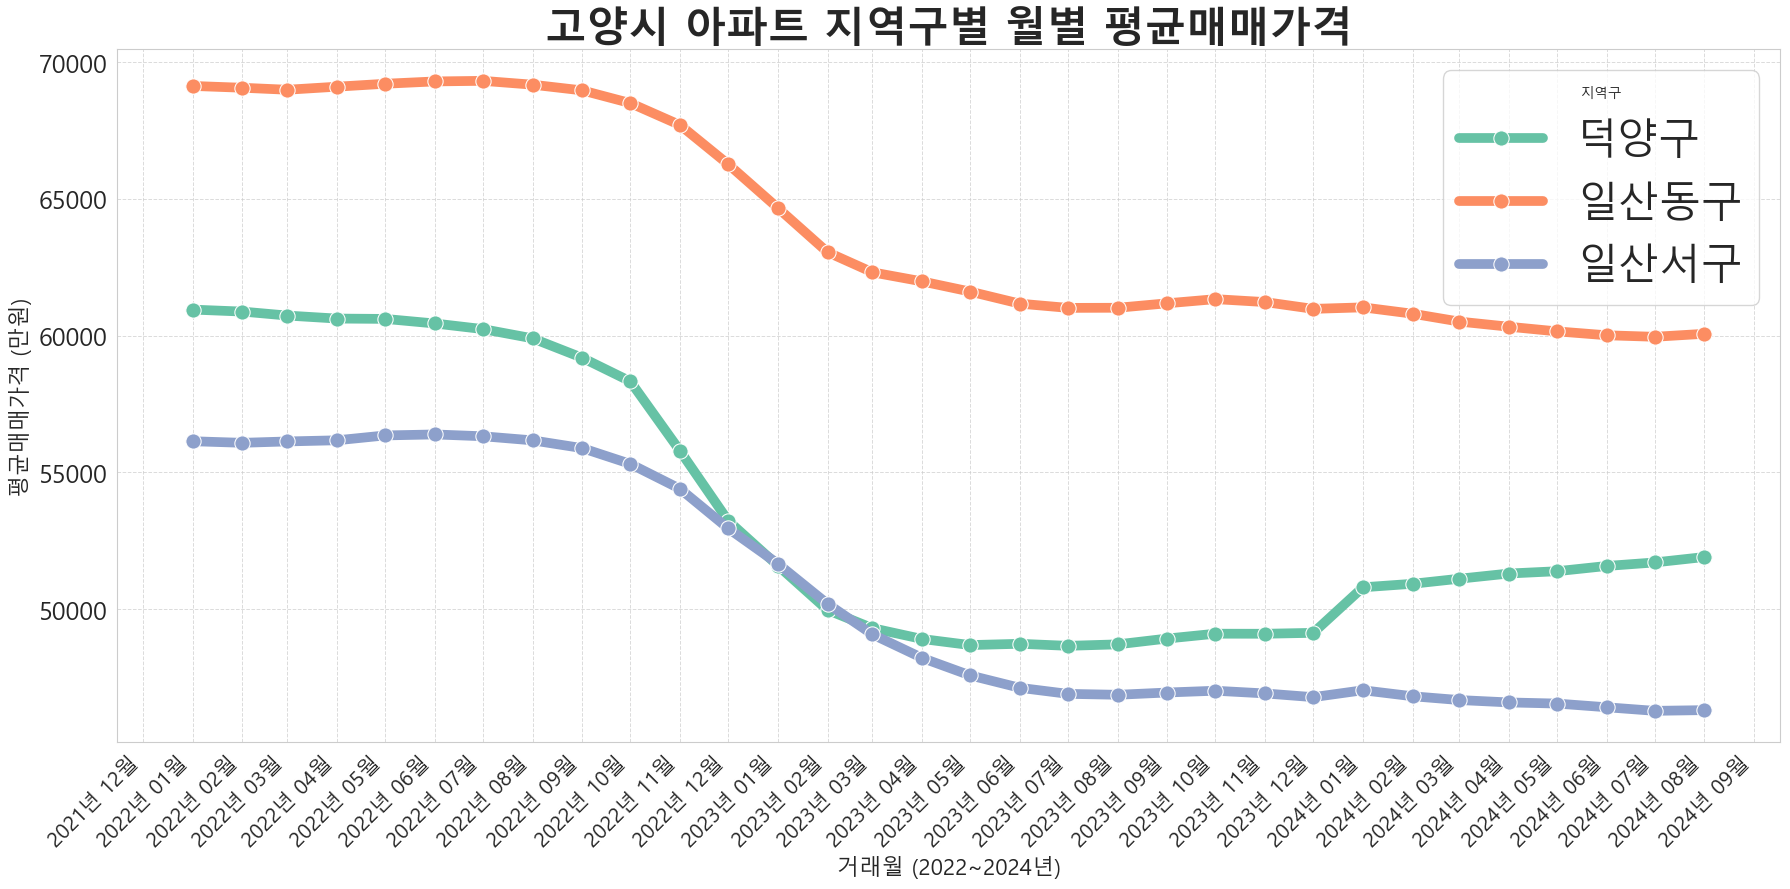

In [24]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc
import seaborn as sns
import matplotlib.dates as mdates
import pandas as pd

# 한글 폰트 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # 사용할 폰트 경로 삽입
font = fm.FontProperties(fname=font_path).get_name()
rc('font', family=font)
plt.rcParams['axes.unicode_minus'] = False

# 데이터 전처리
items_monthly_indi_gu = goyang_apt_tx.copy()
items_monthly_indi_gu['WRTTIME_IDTFR_ID'] = pd.to_datetime(items_monthly_indi_gu['WRTTIME_IDTFR_ID'], format='%Y%m')

# 그래프 설정
plt.figure(figsize=(18, 9))

# 스타일 및 색상 설정
#sns.set_palette("Set2")  # 부드러운 색상 팔레트 사용
sns.lineplot(data=items_monthly_indi_gu, x='WRTTIME_IDTFR_ID', y='DTA_VAL', hue='CLS_NM', marker='o',  markersize = 11, linewidth=7, palette='Set2')

# 제목과 축 레이블 설정
plt.title('고양시 아파트 지역구별 월별 평균매매가격', fontsize=30, weight='bold')
plt.xlabel('거래월 (2022~2024년)', fontsize=16)
plt.ylabel('평균매매가격 (만원)', fontsize=16)

# 날짜 포맷 설정
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y년 %m월'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

# X축과 Y축 눈금 글자 크기 설정
plt.xticks(rotation=45, ha='right', fontsize=15)
plt.yticks(fontsize=18)

# 눈금선 추가 및 스타일 설정
plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)

plt.legend(title='지역구', fontsize=30)

# 레이아웃 조정
plt.tight_layout()

# 그래프 표시
plt.show()


In [185]:
import dash
from dash import dcc, html
import plotly.express as px
import pandas as pd

# 데이터 전처리
goyang_monthly_tx = goyang_apt_tx.copy()
goyang_monthly_tx['WRTTIME_IDTFR_ID'] = pd.to_datetime(goyang_monthly_tx['WRTTIME_IDTFR_ID'], format='%Y%m')

# Plotly 그래프 생성 (지역구별 라인 그래프)
fig = px.line(goyang_monthly_tx, 
              x='WRTTIME_IDTFR_ID', 
              y='DTA_VAL', 
              color='CLS_NM',  # 지역구별로 색상 구분
              markers=True, 
              labels={'WRTTIME_IDTFR_ID': '거래월', 'DTA_VAL': '평균매매가격(만원)', 'CLS_NM': '지역구'})

# 선 그래프 색상 및 굵기 설정
fig.update_traces(line=dict(width=7),  # 선 굵기 통일
                  marker=dict(size=11))  # 마커 크기 통일

# y축 라벨 형식 수정
y_min = goyang_monthly_tx['DTA_VAL'].min()
y_min_with_margin = y_min - (y_min * 0.03)  # 3% 마진 추가
y_max = goyang_monthly_tx['DTA_VAL'].max()
y_max_with_margin = y_max + (y_max * 0.03)  # 3% 마진 추가

tickvals = list(range(int(y_min_with_margin // 1000 * 1000), int(y_max_with_margin // 1000 * 1000) + 1000, 1000))  # 리스트로 변환
ticktext = [f"{int(value // 10000)}억{value % 10000:04}만원" for value in tickvals]  # 형식 수정

# 그래프 레이아웃 업데이트 (크기, 제목, 축 스타일, 배경색 등)
fig.update_layout(
    title={
        'text': '고양시 아파트 지역구별 월별 평균매매가격',
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {'size': 28, 'family': 'Montserrat', 'color': '#2B3E50'}
    },
    xaxis=dict(
        title='거래월 (2022~2024년)',
        tickfont=dict(size=16, family='Roboto', color='#3E3E3E'),
        titlefont=dict(size=20, family='Roboto', color='#2B3E3E'),
        tickmode='linear',
        dtick='M1',
        gridwidth=1
    ),
    yaxis=dict(
        title='평균매매가격(만원)',
        tickfont=dict(size=16, family='Roboto', color='#3E3E3E'),
        titlefont=dict(size=20, family='Roboto', color='#2B3E50'),
        tickmode='array',
        tickvals=tickvals,
        ticktext=ticktext,
        range=[y_min_with_margin, y_max_with_margin]
    ),
    width=1200,
    height=700,
    plot_bgcolor='white',
    paper_bgcolor='#F8F8FF',
    xaxis_tickformat='%Y년 %m월',
    xaxis_tickangle=45,
    margin=dict(l=40, r=40, t=80, b=60),
    legend=dict(
        title='지역구',  # 범례 제목
        font=dict(size=25),
        orientation='v',
        yanchor="top",
        y=0.95,  # 그래프 상단에 배치
        xanchor="right",
        x=0.95,  # 그래프 오른쪽에 배치
        bgcolor='rgba(255, 255, 255, 0.5)'  # 반투명한 배경 적용
    )
)

# y축 점선 추가
for y_value in range(int(y_min_with_margin//1000*1000), int(y_max_with_margin//1000*1000), 1000):
    fig.add_shape(type='line',
                  xref='paper', x0=0, x1=1,
                  yref='y', y0=y_value, y1=y_value,
                  line=dict(color="rgba(180,180,180,0.7)", width=1, dash="dot"))  # 점선과 굵기 설정

# x축 점선 추가
for x_value in goyang_monthly_tx['WRTTIME_IDTFR_ID'].unique():
    fig.add_shape(type='line',
                  yref='paper', y0=0, y1=1,
                  xref='x', x0=x_value, x1=x_value,
                  line=dict(color="rgba(180,180,180,0.7)", width=1, dash="dot"))  # 점선과 굵기 설정

# Dash 애플리케이션 초기화
app = dash.Dash(__name__)

# 레이아웃 정의
app.layout = html.Div([
    dcc.Graph(id='line-chart', figure=fig)
])

# 애플리케이션 실행
if __name__ == '__main__':
    app.run_server(debug=True)


posx and posy should be finite values
posx and posy should be finite values


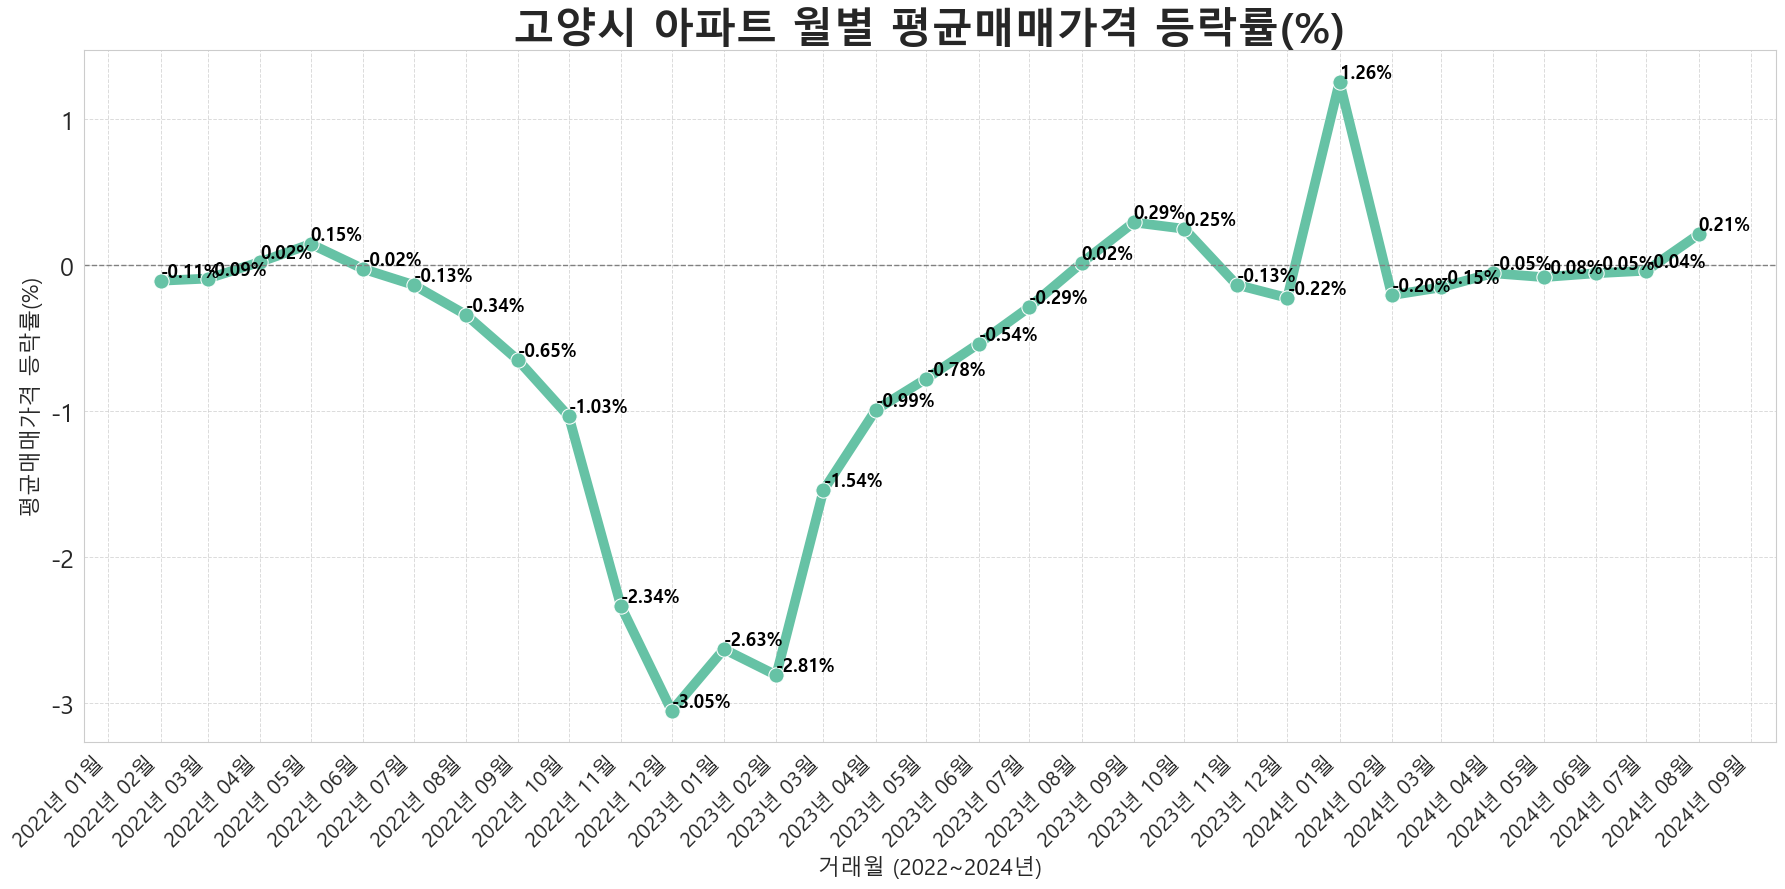

In [25]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc
import seaborn as sns
import matplotlib.dates as mdates
import pandas as pd

# 한글 폰트 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # 사용할 폰트 경로 삽입
font = fm.FontProperties(fname=font_path).get_name()
rc('font', family=font)

# 데이터 전처리
goyang_monthly_indi_change = goyang_apt_tx.copy()
goyang_monthly_indi_change['WRTTIME_IDTFR_ID'] = pd.to_datetime(goyang_monthly_indi_change['WRTTIME_IDTFR_ID'], format='%Y%m')

monthly_avg_indi_change = goyang_monthly_indi_change.groupby('WRTTIME_IDTFR_ID')['DTA_VAL'].mean().reset_index()

# 전월 대비 등락률 계산
monthly_avg_indi_change = monthly_avg_indi_change.sort_values('WRTTIME_IDTFR_ID')
monthly_avg_indi_change['prev_valAmount'] = monthly_avg_indi_change['DTA_VAL'].shift(1)
monthly_avg_indi_change['change_rate'] = (monthly_avg_indi_change['DTA_VAL'] - monthly_avg_indi_change['prev_valAmount']) / monthly_avg_indi_change['prev_valAmount'] * 100

# 그래프 설정
plt.figure(figsize=(18, 9))

# 스타일 및 색상 설정
sns.set_palette("Set2")  # 부드러운 색상 팔레트 사용
sns.lineplot(data=monthly_avg_indi_change, x='WRTTIME_IDTFR_ID', y='change_rate', marker='o',  markersize = 11, linewidth=7)

# 제목과 축 레이블 설정
plt.title('고양시 아파트 월별 평균매매가격 등락률(%)', fontsize=30, weight='bold')
plt.xlabel('거래월 (2022~2024년)', fontsize=16)
plt.ylabel('평균매매가격 등락률(%)', fontsize=16)

# 날짜 포맷 설정
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y년 %m월'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

# X축과 Y축 눈금 글자 크기 설정
plt.xticks(rotation=45, ha='right', fontsize=15)
plt.yticks(fontsize=18)

# 눈금선 추가 및 스타일 설정
plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)

# Y축 0에 가로선 추가
plt.axhline(y=0, color='gray', linestyle='--', linewidth=1)

# 그래프 위에 등락률 수치 추가
for i in range(len(monthly_avg_indi_change)):
    plt.text(monthly_avg_indi_change['WRTTIME_IDTFR_ID'].iloc[i], monthly_avg_indi_change['change_rate'].iloc[i], 
             f'{monthly_avg_indi_change["change_rate"].iloc[i]:.2f}%', 
             ha='left', va='bottom', fontsize=13, color='black', fontweight = 'bold')


# 레이아웃 조정
plt.tight_layout()

# 그래프 표시
plt.show()

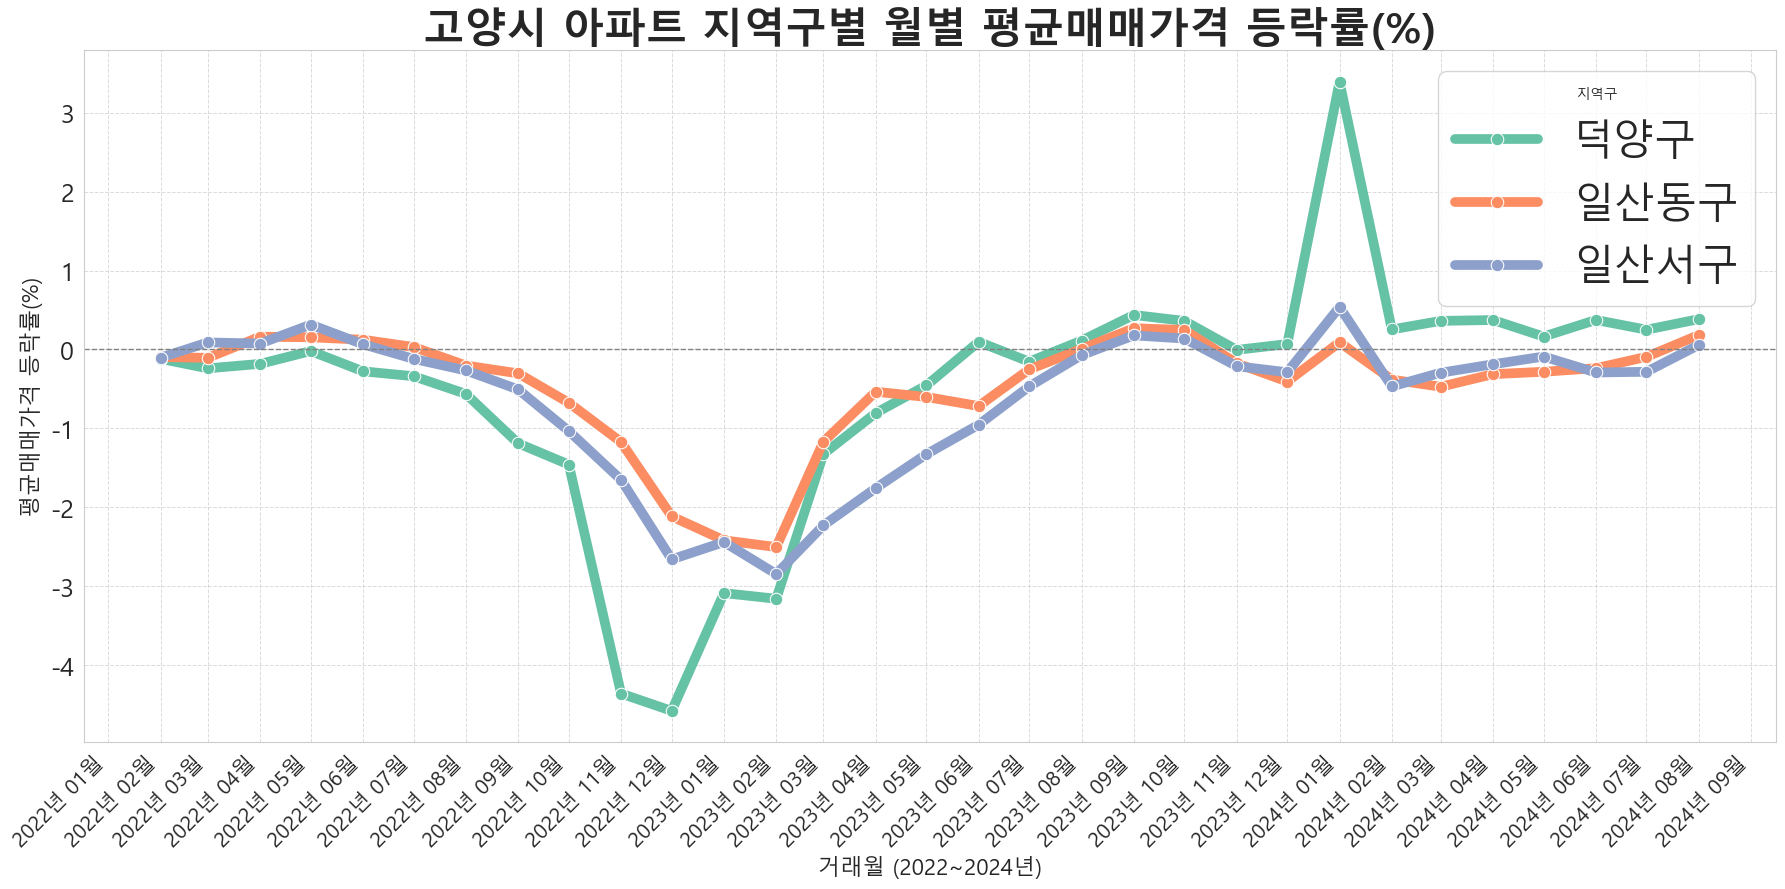

In [26]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc
import seaborn as sns
import matplotlib.dates as mdates
import pandas as pd

# 한글 폰트 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # 사용할 폰트 경로 삽입
font = fm.FontProperties(fname=font_path).get_name()
rc('font', family=font)
plt.rcParams['axes.unicode_minus'] = False

# 데이터 전처리
goyang_monthly_indi_change = goyang_apt_tx.copy()
goyang_monthly_indi_change['WRTTIME_IDTFR_ID'] = pd.to_datetime(goyang_monthly_indi_change['WRTTIME_IDTFR_ID'], format='%Y%m')

monthly_avg_indi_change_gu = goyang_monthly_indi_change.groupby(['WRTTIME_IDTFR_ID', 'CLS_NM'])['DTA_VAL'].mean().reset_index()

# 전월 대비 등락률 계산
monthly_avg_indi_change_gu = monthly_avg_indi_change_gu.sort_values(['CLS_NM', 'WRTTIME_IDTFR_ID'])
monthly_avg_indi_change_gu['prev_valAmount'] = monthly_avg_indi_change_gu.groupby('CLS_NM')['DTA_VAL'].shift(1)
monthly_avg_indi_change_gu['change_rate'] = (monthly_avg_indi_change_gu['DTA_VAL'] - monthly_avg_indi_change_gu['prev_valAmount']) / monthly_avg_indi_change_gu['prev_valAmount'] * 100

# 그래프 설정
plt.figure(figsize=(18, 9))

# 스타일 및 색상 설정
#sns.set_palette("Set2")  # 부드러운 색상 팔레트 사용
sns.lineplot(data=monthly_avg_indi_change_gu, x='WRTTIME_IDTFR_ID', y='change_rate', hue='CLS_NM', marker='o',  markersize = 9, linewidth=7, palette='Set2')

# 제목과 축 레이블 설정
plt.title('고양시 아파트 지역구별 월별 평균매매가격 등락률(%)', fontsize=30, weight='bold')
plt.xlabel('거래월 (2022~2024년)', fontsize=16)
plt.ylabel('평균매매가격 등락률(%)', fontsize=16)

# 날짜 포맷 설정
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y년 %m월'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

# X축과 Y축 눈금 글자 크기 설정
plt.xticks(rotation=45, ha='right', fontsize=15)
plt.yticks(fontsize=18)

# 눈금선 추가 및 스타일 설정
plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)

# Y축 0에 가로선 추가
plt.axhline(y=0, color='gray', linestyle='--', linewidth=1)

plt.legend(title='지역구', fontsize=30)

# 레이아웃 조정
plt.tight_layout()

# 그래프 표시
plt.show()
